# Plot y Overlaps de Sexos en los Bloques

In [16]:
import json
with open(f'configs/gender.json') as json_file:
        gender_dict = json.load(json_file)

with open('configs/ideologies.json') as json_file:
        file = json.load(json_file)

In [3]:
from networkx_graph import RepresentativesGraph
import networkx as nx # Para redes en general
from networkx.readwrite import json_graph
from new_disparity_filter import NewDisparityFilter
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker

import matplotlib.pylab as plt # Para graficar networkx y demases
import matplotlib.cm as cm # para mapas de colores
import numpy as np

In [59]:
years = list(range(1993,2021))
procesador = ProcesadorDeVotaciones(years[0],years[-1], 'data')
congress = procesador.procesar()


Loading from data/1993/1
Loading from data/1993/2
Loading from data/1993/3
Loading from data/1993/4
Loading from data/1993/5
Loading from data/1993/6
Loading from data/1993/7
Loading from data/1993/8
Loading from data/1993/9
Loading from data/1993/10
Loading from data/1993/11
Loading from data/1993/12
Loading from data/1994/1
Loading from data/1994/2
Loading from data/1994/3
Loading from data/1994/4
Loading from data/1994/5
Loading from data/1994/6
Loading from data/1994/7
Loading from data/1994/8
Loading from data/1994/9
Loading from data/1994/10
Loading from data/1994/11
Loading from data/1994/12
Loading from data/1995/1
Loading from data/1995/2
Loading from data/1995/3
Loading from data/1995/4
Loading from data/1995/5
Loading from data/1995/6
Loading from data/1995/7
Loading from data/1995/8
Loading from data/1995/9
Loading from data/1995/10
Loading from data/1995/11
Loading from data/1995/12
Loading from data/1996/1
Loading from data/1996/2
Loading from data/1996/3
Loading from dat

Loading from data/2020/2
Loading from data/2020/3
Loading from data/2020/4
Loading from data/2020/5
Loading from data/2020/6
Loading from data/2020/7
Loading from data/2020/8
Loading from data/2020/9
Loading from data/2020/10
Loading from data/2020/11
Loading from data/2020/12


In [57]:
alphas  = {}
alphas[1993] = 0.185
alphas[1994] = 0.185
alphas[1995] = 0.21 #dudoso
alphas[1996] = 0.2
alphas[1997] = 0.19
alphas[1998] = 0.24
alphas[1999] = 0.25 #dudoso, GC = 0.8
alphas[2000] = 0.25
alphas[2001] = 0.22
alphas[2002] = 0.17
alphas[2003] = 0.17
alphas[2004] = 0.26 
alphas[2005] = 0.21
alphas[2006] = 0.145
alphas[2007] = 0.13
alphas[2008] = 0.222
alphas[2009] = 0.2
alphas[2010] = 0.22
alphas[2011] = 0.19 #rari
alphas[2012] = 0.231 #many edges
alphas[2013] = 0.32 #5k de edges
alphas[2014] = 0.22
alphas[2015]  = 0.2 
alphas[2016] = 0.26
alphas[2017] = 0.19 #hay un grupo muy separado que si nos vamos a 0.185 se sale de la GC
alphas[2018] = 0.25
alphas[2019] = 0.17
alphas[2020] = 0.3 #9k muy loco, hermoso

## Funciones

In [5]:
def get_GC(year,alpha,congreso):
    maker = HeavyGraphMaker(congreso)
    grafo = maker.create_year_network(year, positive = True)
    copia = grafo.copy()
    grafo_cortado = NewDisparityFilter(copia).alpha_cut(alpha_t = alpha)
    GC_cut, _ = grafo_cortado.gigant_component()
    return GC_cut

In [12]:
def get_gender_dict(graph,year):
    dict_gender = {}
    for gender in set(gender_dict.values()):
        dict_gender[gender] = {}
        nodes = []
        for node in graph.get_nodes():
            if gender_dict[node.name] == gender:
                nodes.append(node)
        dict_gender[gender] = nodes
    return dict_gender

In [14]:
def get_ideologies_dict(graph,year):
    dict_ideologies = {}
    for ideology in file[str(year)]:
        dict_ideologies[ideology] = {}
        nodes = []
        for node in graph.get_nodes():
            if list(node.parties[year])[0].text in file[str(year)][ideology]:
                nodes.append(node)
        dict_ideologies[ideology] = nodes
    return dict_ideologies

In [13]:
def get_weights(graph):
    new_weights = []
    for e in graph.get_edges():
        new_weights.append(graph.graph[e[0]][e[1]]['weight'])
    return new_weights

In [62]:
def intersection(dict_gender,dict_ideo, dict_a_guardar):
    for ideology in dict_ideo:
        dict_a_guardar[ideology] = {} 
        for gender in dict_gender:
            dict_a_guardar[ideology][gender] = {} 
            a = set(dict_ideo[ideology])
            
            interseccion = a.intersection(set(dict_gender[gender]))
            if len(a) != 0:
                dict_a_guardar[ideology][gender] = len(interseccion) / len(a)
            else:
                dict_a_guardar[ideology][gender] = '-'
            
            #le agrego el tamanio de cada comunidad como variable
            dict_a_guardar[ideology]['Tamaño (nodos)'] = {}
            dict_a_guardar[ideology]['Tamaño (nodos)'] = len(dict_ideo[ideology])
    return dict_a_guardar

In [63]:
def plot_graph_gender(dict_gend,graph,year):
    fig, axs = plt.subplots(1,1, figsize=(9,5))
    pos = nx.spring_layout(graph)
    
    color_map = []
    for node in graph.nodes():
        if node in dict_gend['female']:
            color_map.append('red')
        else: 
            color_map.append('blue') 
    
    nx.draw_networkx_nodes(graph, ax = axs,node_size=10, node_color=color_map,pos=pos)
    nx.draw_networkx_edges(graph, ax = axs, width=1.0, alpha=0.01,pos=pos)
    axs.set_title(f'Grafo Según Sexo {year}')
    axs.axis('off')
    axs.legend()


In [64]:
years

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

The graph has 24077 edges
Max alpha is 0.8682601008947574, min alpha is 0.00047550923055756413
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
17524 edges deleted, 6553 left. 27.217% left.
Gigant component is 0.9115384615384615 of the total


No handles with labels found to put in legend.


The graph has 16885 edges
Max alpha is 0.8955735465567767, min alpha is 0.014555190523415234
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14058 edges deleted, 2827 left. 16.743% left.
Gigant component is 0.926923076923077 of the total


No handles with labels found to put in legend.


The graph has 17178 edges
Max alpha is 0.9270187387650284, min alpha is 0.0004093466004292773
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14064 edges deleted, 3114 left. 18.128% left.
Gigant component is 0.9693486590038314 of the total


No handles with labels found to put in legend.


The graph has 18614 edges
Max alpha is 0.924675934618428, min alpha is 0.010257666057562497
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
15204 edges deleted, 3410 left. 18.32% left.
Gigant component is 0.918918918918919 of the total


No handles with labels found to put in legend.


The graph has 16974 edges
Max alpha is 0.915612436381828, min alpha is 0.013140821993589716
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
15909 edges deleted, 1065 left. 6.274% left.
Gigant component is 0.9157088122605364 of the total


No handles with labels found to put in legend.


The graph has 17122 edges
Max alpha is 0.9035314044106186, min alpha is 0.04229678723349828
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14199 edges deleted, 2923 left. 17.072% left.
Gigant component is 0.9416342412451362 of the total


No handles with labels found to put in legend.


The graph has 15714 edges
Max alpha is 0.8779724269761051, min alpha is 0.001469508243540527
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
9372 edges deleted, 6342 left. 40.359% left.
Gigant component is 0.8821292775665399 of the total


No handles with labels found to put in legend.


The graph has 16135 edges
Max alpha is 0.9213401512966994, min alpha is 0.0013695219022856057
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
12353 edges deleted, 3782 left. 23.44% left.
Gigant component is 0.9584905660377359 of the total


No handles with labels found to put in legend.


The graph has 16263 edges
Max alpha is 0.8670522484659277, min alpha is 0.009047433571121961
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
12485 edges deleted, 3778 left. 23.231% left.
Gigant component is 0.9315589353612167 of the total


No handles with labels found to put in legend.


The graph has 18301 edges
Max alpha is 0.9312912006100128, min alpha is 0.003800873589315883
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14629 edges deleted, 3672 left. 20.064% left.
Gigant component is 0.9471698113207547 of the total


No handles with labels found to put in legend.


The graph has 17335 edges
Max alpha is 0.9234455974625507, min alpha is 0.013937866102812753
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14581 edges deleted, 2754 left. 15.887% left.
Gigant component is 0.9239543726235742 of the total


No handles with labels found to put in legend.


The graph has 16610 edges
Max alpha is 0.9691094040187698, min alpha is 0.0014118516593961147
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
12098 edges deleted, 4512 left. 27.164% left.
Gigant component is 0.9767441860465116 of the total


No handles with labels found to put in legend.


The graph has 18513 edges
Max alpha is 0.934547980103473, min alpha is 0.00012633236331653319
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
12813 edges deleted, 5700 left. 30.789% left.
Gigant component is 0.9651162790697675 of the total


No handles with labels found to put in legend.


The graph has 32280 edges
Max alpha is 0.9870461398793585, min alpha is 0.007131813907600438
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
Enlaces sacados: 21000
Enlaces sacados: 22000
Enlaces sacados: 23000
Enlaces sacados: 24000
Enlaces sacados: 25000
Enlaces sacados: 26000
Enlaces sacados: 27000
Enlaces sacados: 28000
Enlaces sacados: 29000
29011 edges deleted, 3269 left. 10.127% left.
Gigant component is 0.9060150375939849 of the total


No handles with labels found to put in legend.


The graph has 32299 edges
Max alpha is 0.9717005631599324, min alpha is 0.004825139321430739
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
Enlaces sacados: 21000
Enlaces sacados: 22000
Enlaces sacados: 23000
Enlaces sacados: 24000
Enlaces sacados: 25000
Enlaces sacados: 26000
Enlaces sacados: 27000
Enlaces sacados: 28000
28923 edges deleted, 3376 left. 10.452% left.
Gigant component is 0.9589552238805971 of the total


No handles with labels found to put in legend.


The graph has 23558 edges
Max alpha is 0.9795908729132194, min alpha is 0.01276732696954135
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
19728 edges deleted, 3830 left. 16.258% left.
Gigant component is 0.9031007751937985 of the total


No handles with labels found to put in legend.


The graph has 26699 edges
Max alpha is 0.9661479074230014, min alpha is 0.006290054516902114
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
19959 edges deleted, 6740 left. 25.244% left.
Gigant component is 0.9128787878787878 of the total


No handles with labels found to put in legend.


The graph has 21672 edges
Max alpha is 0.9698818298353061, min alpha is 0.04220997379406387
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
16985 edges deleted, 4687 left. 21.627% left.
Gigant component is 0.9122137404580153 of the total


No handles with labels found to put in legend.


The graph has 31840 edges
Max alpha is 0.9407885314885266, min alpha is 0.012607871663352525
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
Enlaces sacados: 21000
Enlaces sacados: 22000
Enlaces sacados: 23000
Enlaces sacados: 24000
Enlaces sacados: 25000
Enlaces sacados: 26000
26967 edges deleted, 4873 left. 15.305% left.
Gigant component is 0.9498069498069498 of the total


No handles with labels found to put in legend.


The graph has 23073 edges
Max alpha is 0.9702299027877322, min alpha is 0.010202792749007353
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
17432 edges deleted, 5641 left. 24.448% left.
Gigant component is 0.8992248062015504 of the total


No handles with labels found to put in legend.


The graph has 17099 edges
Max alpha is 0.9757800831586314, min alpha is 0.00038236956289207645
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
12054 edges deleted, 5045 left. 29.505% left.
Gigant component is 0.9692307692307692 of the total


C:\Users\Luna\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
No handles with labels found to put in legend.


The graph has 23139 edges
Max alpha is 0.9816103895024079, min alpha is 0.005607346598294809
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
19351 edges deleted, 3788 left. 16.371% left.
Gigant component is 0.9459459459459459 of the total


No handles with labels found to put in legend.


The graph has 27687 edges
Max alpha is 0.9580959329539479, min alpha is 0.0004995924411763362
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
19200 edges deleted, 8487 left. 30.653% left.
Gigant component is 0.9153846153846154 of the total


No handles with labels found to put in legend.


The graph has 20242 edges
Max alpha is 0.9884624966278152, min alpha is 0.005494840210910524
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
15956 edges deleted, 4286 left. 21.174% left.
Gigant component is 0.9845559845559846 of the total


No handles with labels found to put in legend.


The graph has 27529 edges
Max alpha is 0.982494008304269, min alpha is 0.00018802379976860532
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
20527 edges deleted, 7002 left. 25.435% left.
Gigant component is 0.9807692307692307 of the total


No handles with labels found to put in legend.


The graph has 18005 edges
Max alpha is 0.969895196796066, min alpha is 0.027936266706667375
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
14784 edges deleted, 3221 left. 17.889% left.
Gigant component is 0.9575289575289575 of the total


No handles with labels found to put in legend.


The graph has 25774 edges
Max alpha is 0.9735252711482005, min alpha is 0.029449692694460218
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
20382 edges deleted, 5392 left. 20.92% left.
Gigant component is 0.9420849420849421 of the total


No handles with labels found to put in legend.


The graph has 19446 edges
Max alpha is 1, min alpha is 0.12836313566591792
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
9983 edges deleted, 9463 left. 48.663% left.
Gigant component is 0.8532818532818532 of the total


No handles with labels found to put in legend.


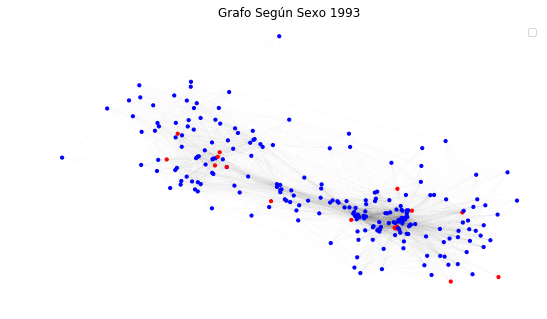

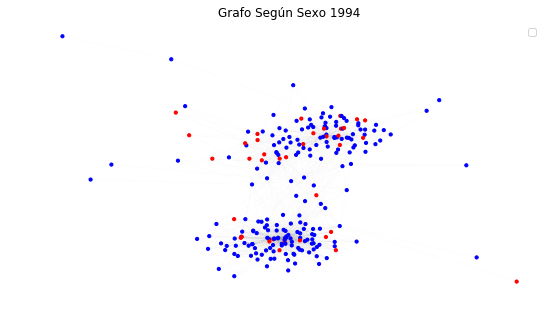

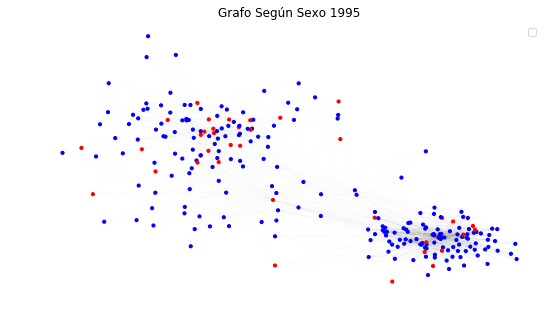

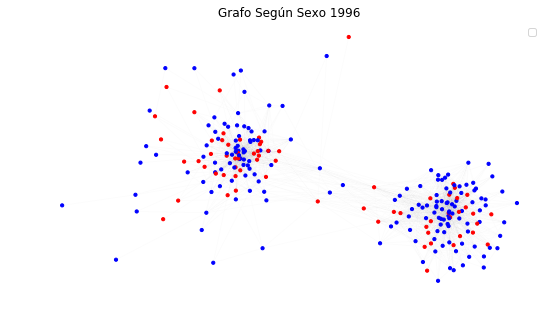

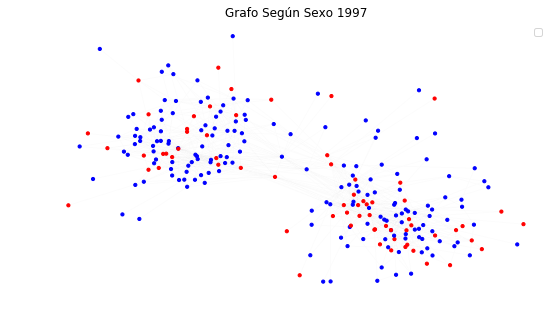

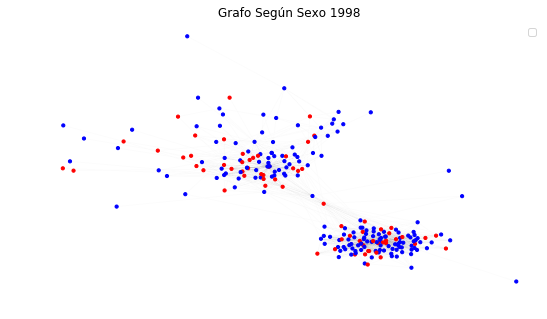

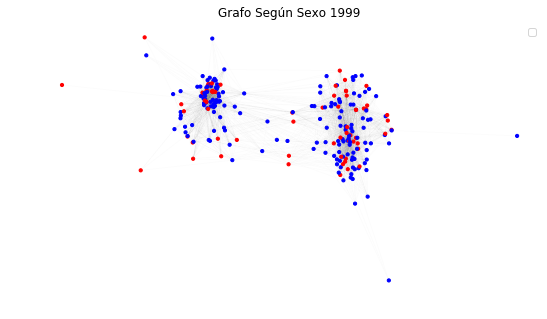

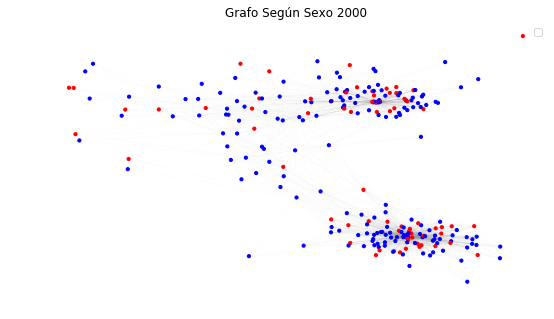

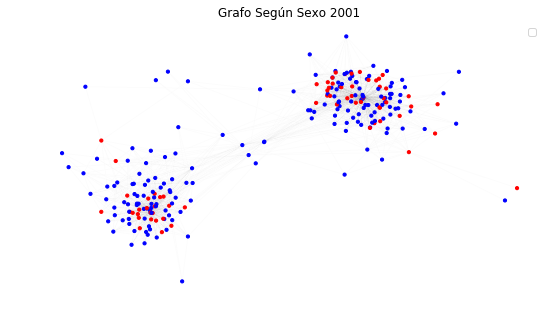

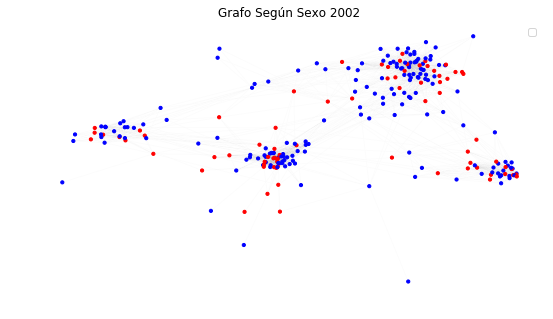

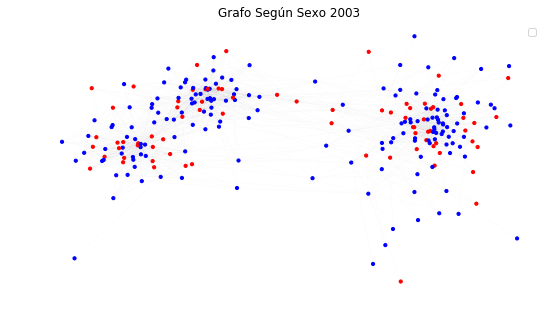

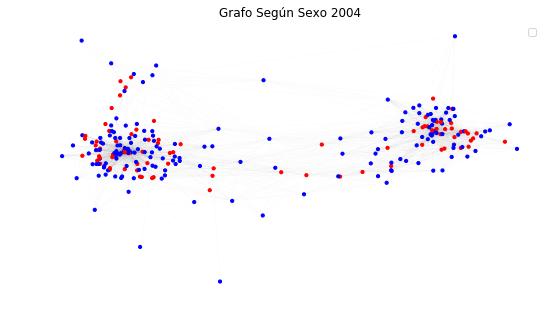

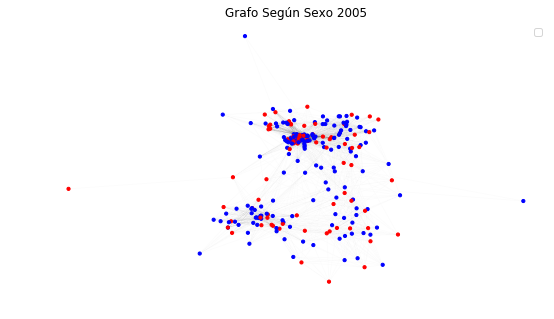

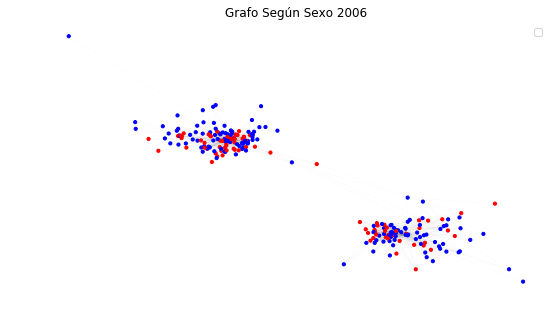

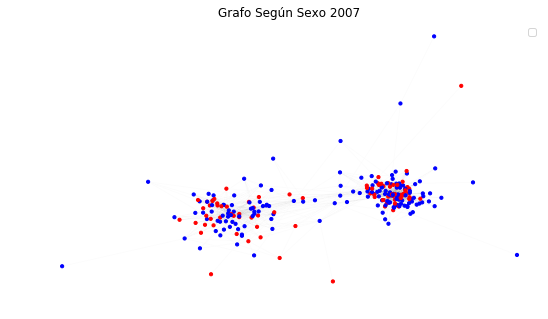

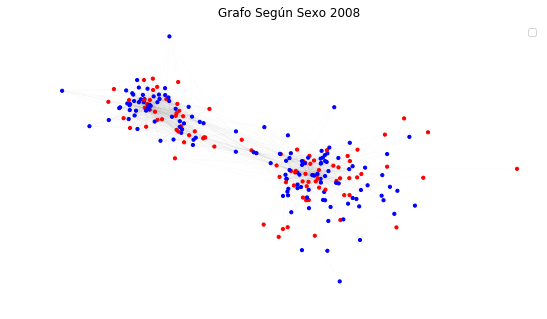

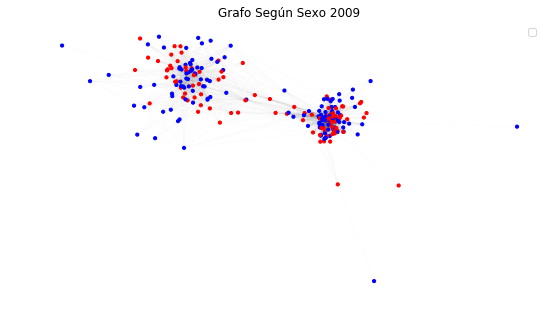

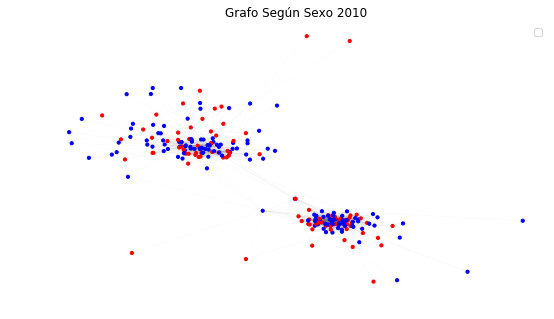

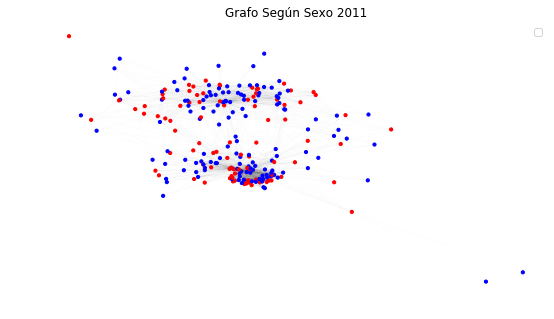

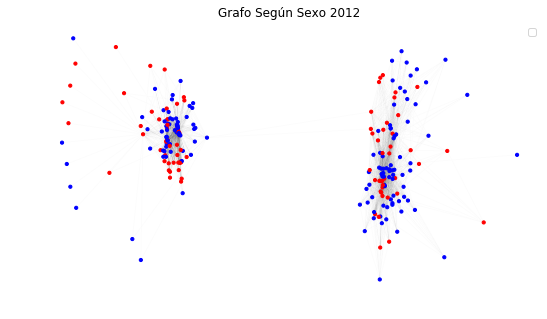

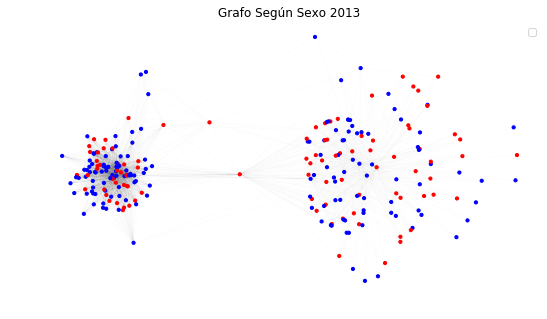

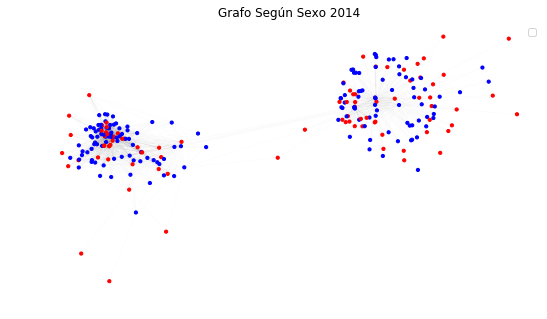

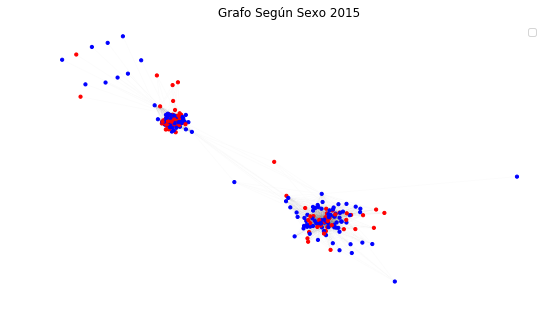

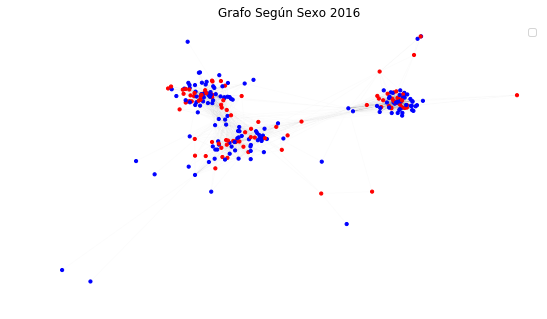

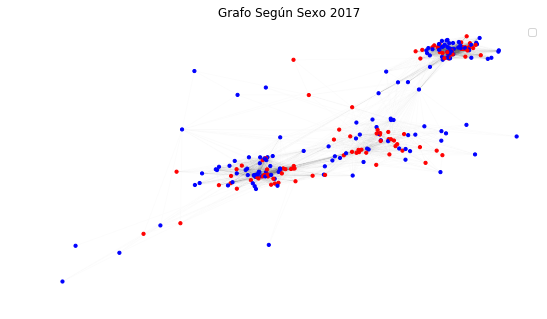

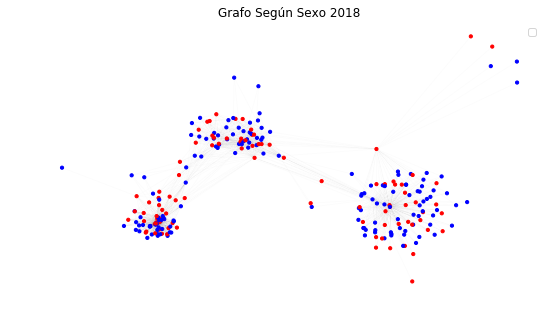

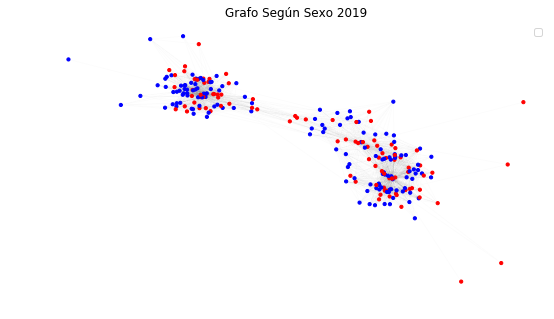

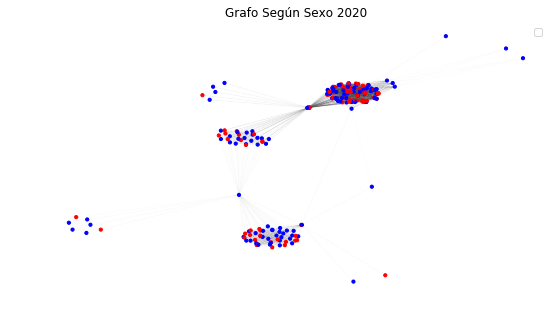

In [65]:
for year in years:

    grafo = get_GC(year,alphas[year],congress)
    dict_ideo = get_ideologies_dict(grafo,year)
    dict_gender = get_gender_dict(grafo,year)

    dict_a_guardar = {}
    intersection(dict_gender,dict_ideo, dict_a_guardar)

    plot_graph_gender(dict_gender,grafo.graph,year)

    plt.savefig(f'../figs/gender_graphs/{year}.jpg')
    with open(f'metrics/{year}_gender_overlap_data.json', 'w') as outfile:
            json.dump(dict_a_guardar, outfile)


In [54]:
import pandas as pd
#fastgreedy algo
nodos_df = dict_a_guardar.copy() #no modificar data
df = pd.DataFrame(nodos_df).transpose()
df = df.astype(float).round(3)

df

,Tamaño (nodos),female,male
Justicialismo,63.0,0.413,0.587
Cambiemos,99.0,0.343,0.657
Peronismo disidente,27.0,0.370,0.630


## Grafico  a traves de los anios

In [66]:
import json
gender_metrics = {}
for year in range(1993, 2020 + 1):
    with open(f'metrics/{year}_gender_overlap_data.json') as json_file:
        gender_metrics[year] = json.load(json_file)

In [73]:
all_ideologies = []

for y in gender_metrics.keys():
    for ideology in gender_metrics[y]:
        all_ideologies = list(set(all_ideologies + [ideology for ideology in gender_metrics[y].keys()]))

In [80]:
perc_female = {k: [] for k in all_ideologies}

import numpy as np

for y in gender_metrics.keys(): 
    for ideology in all_ideologies:
        if ideology in list(gender_metrics[y].keys()):
            if type(gender_metrics[y][ideology]['female']) == str:
                perc_female[ideology].append(np.nan)
            else:
                perc_female[ideology].append(gender_metrics[y][ideology]['female'])
        else:
            perc_female[ideology].append(np.nan)

In [91]:
colores = ['orange','mediumseagreen','salmon','gold','cyan','violet','royalblue','mediumvioletred','firebrick']
dict_colores = {k: colores[i] for i,k in enumerate(all_ideologies)}
dict_colores

{'Cambiemos': 'orange',
 'Peronismo disidente': 'mediumseagreen',
 'Disidente 2': 'salmon',
 'PRO': 'gold',
 'Disidente 1': 'cyan',
 'Liberal': 'violet',
 'Justicialismo': 'royalblue',
 'Socialismo': 'mediumvioletred',
 'Radicalismo': 'firebrick'}

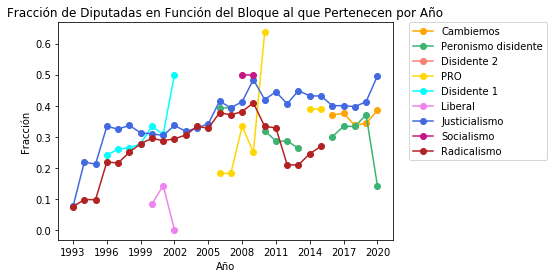

In [92]:
for i,ideology in enumerate(all_ideologies):
    plt.plot(list(range(1993,2021)),perc_female[ideology],'-o',color=dict_colores[ideology], label= f'{ideology}')  
plt.title('Fracción de Diputadas en Función del Bloque al que Pertenecen por Año') 
plt.ylabel('Fracción')
plt.xlabel('Año')
plt.xticks(list(np.arange(1993,2021,3)))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)